## Observations and Insights 

In [18]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset

df = pd.merge(mouse_metadata, study_results, how="inner", on="Mouse ID")

# Display the data table for preview

df.head(35)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1893 entries, 0 to 1892
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1893 non-null   object 
 1   Drug Regimen        1893 non-null   object 
 2   Sex                 1893 non-null   object 
 3   Age_months          1893 non-null   int64  
 4   Weight (g)          1893 non-null   int64  
 5   Timepoint           1893 non-null   int64  
 6   Tumor Volume (mm3)  1893 non-null   float64
 7   Metastatic Sites    1893 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 133.1+ KB


In [20]:
# Checking the number of mice.

num_mice = df["Mouse ID"].nunique()
print(f"Number of mice = {num_mice}")

Number of mice = 249


In [21]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

are_dupes = df.duplicated(subset=["Mouse ID", "Timepoint"])

df[are_dupes]

dupe_mouseids = df[are_dupes]["Mouse ID"].unique()

dupe_mouseids



array(['g989'], dtype=object)

In [22]:
# Optional: Get all the data for the duplicate mouse ID. 

for id in dupe_mouseids:
    print(f"{id} REPORT\n")
    print(df[df["Mouse ID"] == id])



g989 REPORT

    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
908     g989     Propriva  Female          21          26          0   
909     g989     Propriva  Female          21          26          0   
910     g989     Propriva  Female          21          26          5   
911     g989     Propriva  Female          21          26          5   
912     g989     Propriva  Female          21          26         10   
913     g989     Propriva  Female          21          26         10   
914     g989     Propriva  Female          21          26         15   
915     g989     Propriva  Female          21          26         15   
916     g989     Propriva  Female          21          26         20   
917     g989     Propriva  Female          21          26         20   
918     g989     Propriva  Female          21          26         25   
919     g989     Propriva  Female          21          26         30   
920     g989     Propriva  Female          21      

In [23]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.


clean_df = df.loc[df["Mouse ID"] != dupe_mouseids[0], :]

clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [24]:
# Checking the number of mice in the clean DataFrame.
old_num_mice = num_mice
num_mice = clean_df["Mouse ID"].nunique()
print(f"Now there are {num_mice} mice; before there were {old_num_mice} mice.")

Now there are 248 mice; before there were 249 mice.


## Summary Statistics

In [25]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

df = clean_df.copy()

regimens = clean_df["Drug Regimen"].unique().tolist()

regimens

clean_df["Drug Regimen"].value_counts()

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Infubinol    178
Ceftamin     178
Propriva     148
Name: Drug Regimen, dtype: int64

In [48]:
drug_groups = clean_df.groupby("Drug Regimen")
tum_vols = drug_groups["Tumor Volume (mm3)"]
tum_vols.describe()

,count,mean,std,min,25%,50%,75%,max
Drug Regimen,,,,,,,,
Capomulin,230.0,40.675741,4.994774,23.343598,37.685933,41.557809,45.000000,48.158209
Ceftamin,178.0,52.591172,6.268188,45.000000,47.208427,51.776157,56.801438,68.923185
Infubinol,178.0,52.884795,6.567243,36.321346,47.312353,51.820584,57.314444,72.226731
Ketapril,188.0,55.235638,8.279709,45.000000,48.232987,53.698743,60.870951,78.567014
Naftisol,186.0,54.331565,8.134708,45.000000,47.285874,52.509285,59.963034,76.668817
Placebo,181.0,54.033581,7.821003,45.000000,47.459053,52.288934,59.916934,73.212939
Propriva,148.0,52.320930,6.622085,45.000000,46.894328,50.446266,56.491585,72.455421
Ramicane,228.0,40.216745,4.846308,22.050126,36.674635,40.673236,45.000000,47.622816
Stelasyn,181.0,54.233149,7.710419,45.000000,48.047139,52.431737,58.719297,75.123690


In [49]:
tum_mean = tum_vols.mean()
tum_mean.name = "tum_mean"
print(tum_mean)

Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.320930
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: tum_mean, dtype: float64


In [50]:
tum_variance = tum_vols.var()
tum_variance.name = "tum_variance"
print(tum_variance)

Drug Regimen
Capomulin    24.947764
Ceftamin     39.290177
Infubinol    43.128684
Ketapril     68.553577
Naftisol     66.173479
Placebo      61.168083
Propriva     43.852013
Ramicane     23.486704
Stelasyn     59.450562
Zoniferol    48.533355
Name: tum_variance, dtype: float64


In [51]:
tum_std = tum_vols.std()
tum_std.name = "tum_std"
print(tum_std)

Drug Regimen
Capomulin    4.994774
Ceftamin     6.268188
Infubinol    6.567243
Ketapril     8.279709
Naftisol     8.134708
Placebo      7.821003
Propriva     6.622085
Ramicane     4.846308
Stelasyn     7.710419
Zoniferol    6.966589
Name: tum_std, dtype: float64


In [52]:
tum_sem = tum_vols.sem()
tum_sem.name = "tum_sed"
print(tum_sem)

Drug Regimen
Capomulin    0.329346
Ceftamin     0.469821
Infubinol    0.492236
Ketapril     0.603860
Naftisol     0.596466
Placebo      0.581331
Propriva     0.544332
Ramicane     0.320955
Stelasyn     0.573111
Zoniferol    0.516398
Name: tum_sed, dtype: float64


In [60]:
final_df = pd.DataFrame(
 
    {
        "tum_mean" : tum_mean,
        "tum_median" : tum_median,
        "tum_variance" : tum_variance,
        "tum_std" : tum_std,
        "tum_sem" : tum_sem
    }
)
     
final_df.sort_index()

,tum_mean,tum_median,tum_variance,tum_std,tum_sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [63]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line


df
single_line_df = df.groupby("Drug Regimen").agg({"Tumor Volume (mm3)": ["mean", "median", np.var, np.std, st.sem]})
single_line_df.sort_index()

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

<AxesSubplot:xlabel='Drug Regimen'>

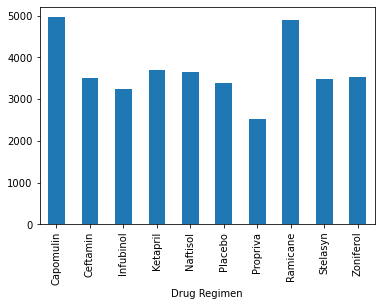

In [70]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

sum_timep = df.groupby("Drug Regimen")["Timepoint"].sum()
sum_timep.plot.bar()

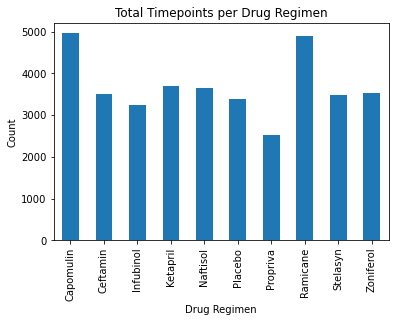

<Figure size 432x288 with 0 Axes>

In [80]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

sum_timep = df.groupby("Drug Regimen")["Timepoint"].sum()

sum_timep_barplot = sum_timep.plot(kind="bar", title="Total Timepoints per Drug Regimen")
sum_timep_barplot.set_xlabel("Drug Regimen")
sum_timep_barplot.set_ylabel("Count")

plt.show()
plt.tight_layout()


<AxesSubplot:ylabel='Mouse ID'>

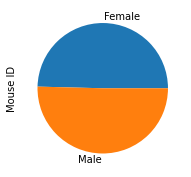

In [77]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

by_sex = df.groupby("Sex")["Mouse ID"].nunique()
by_sex.plot.pie(figsize=(8, 3))

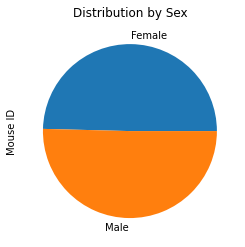

<Figure size 432x288 with 0 Axes>

In [81]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

by_sex_pieplot = by_sex.plot(kind="pie", title="Distribution by Sex")

plt.show()
plt.tight_layout()

## Quartiles, Outliers and Boxplots

In [132]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

mask = df.groupby(["Drug Regimen", "Mouse ID"])[["Timepoint", "Tumor Volume (mm3)"]].max()
mask

Timepoint  Tumor Volume (mm3)
Drug Regimen Mouse ID                               
Capomulin    b128             45           45.651331
             b742             45           45.000000
             f966             20           45.000000
             g288             45           46.304003
             g316             45           46.809225
...                          ...                 ...
Zoniferol    q633             45           70.827796
             s337             45           62.109651
             w140              5           47.717952
             w575             45           68.401286
             x613             15           48.077646

[248 rows x 2 columns]

In [133]:
treatments = mask.index.levels[0].tolist()
treatments

['Capomulin',
 'Ceftamin',
 'Infubinol',
 'Ketapril',
 'Naftisol',
 'Placebo',
 'Propriva',
 'Ramicane',
 'Stelasyn',
 'Zoniferol']

In [ ]:
# Put treatments into a list for for loop (and later for plot labels)

print(treatments)

In [ ]:
# Create empty list to fill with tumor vol data (for plotting)

tumor_dict = {}

In [ ]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
## Locate the rows which contain mice on each drug and get the tumor volumes

for drug in treatments:
    
    tumor_dict[drug] = mask.loc[(drug), ['Tumor Volume (mm3)']]
    
    # print(f"{drug}\n{mask.loc[(drug), ['Tumor Volume (mm3)']]}")

In [152]:
print(tumor_dict["Placebo"])
    
## add subset 
    
    
## Determine outliers using upper and lower bounds
    

          Tumor Volume (mm3)
Mouse ID                    
a262               70.717621
a897               72.255963
c282               65.815165
c757               69.042841
c766               69.823146
e227               73.212939
i477               47.520632
i669               53.303185
j235               52.942902
l872               45.000000
n763               58.011146
o302               62.030594
o795               73.059454
q582               53.713158
q787               66.096475
r850               50.218605
s152               64.119142
s166               49.000125
t718               63.423695
t994               56.527952
v409               50.649038
v989               52.614689
w167               68.134288
x773               58.634971
y478               66.842635


In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
